In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
 
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # 0 = all messages, 3 = only errors
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [4]:
train_dir = '/kaggle/input/dogs-vs-cats/dataset/train'
val_dir = '/kaggle/input/dogs-vs-cats/dataset/validation'
test_dir ='/kaggle/input/dogs-vs-cats/dataset/test'

In [5]:
class_names = ['Cat', 'Dog']
 
datagen = ImageDataGenerator(rescale=1./255)
 
# Генератор для тренувального набору
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

# Генератор для валідаційного набору
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Генератор для тестового набору
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 12461 images belonging to 2 classes.


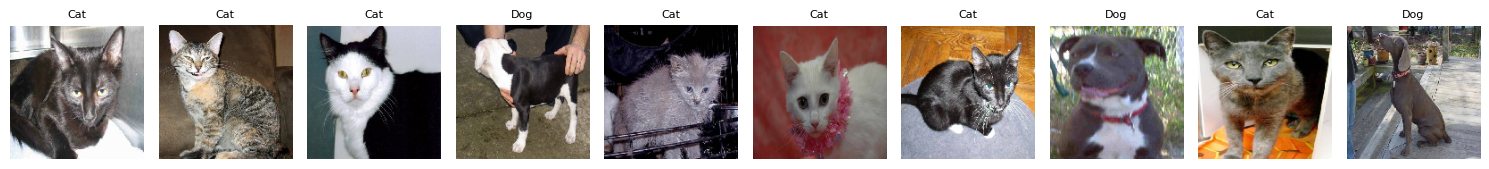

In [6]:
images, labels = next(train_generator)
 
# Випадкові індекси для 10 зображень
indices = np.random.choice(len(images), size=10, replace=False)
 
# Візуалізація
plt.figure(figsize=(15, 3))
for i, idx in enumerate(indices):
    plt.subplot(1, 10, i + 1)
    plt.imshow(images[idx])
    plt.axis('off')
    plt.title(class_names[int(labels[idx])], fontsize=8)
plt.tight_layout()
plt.show()

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization)

In [9]:
model = Sequential()
 
# Згортковий шар 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
# Згортковий шар 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
# Згортковий шар 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
# Пласкі шари
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
 
# Вихідний шар для двох класів
model.add(Dense(1, activation='sigmoid'))  # binary classification

In [10]:
# Компіляція моделі
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
 
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,829,377 (18.42 MB)

 Trainable params: 4,828,929 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)

In [11]:
# Callback-и
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

In [12]:
# Навчання моделі
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    epochs=100,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100


I0000 00:00:1747729260.990425     119 service.cc:148] XLA service 0x7a7460011e90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747729260.991149     119 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1747729261.471917     119 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/625 ━━━━━━━━━━━━━━━━━━━━ 1:46:51 10s/step - accuracy: 0.5938 - loss: 1.1483

I0000 00:00:1747729266.774565     119 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 237ms/step - accuracy: 0.5842 - loss: 1.7123 - val_accuracy: 0.5712 - val_loss: 0.6658 - learning_rate: 0.0010
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 108ms/step - accuracy: 0.6593 - loss: 0.6084 - val_accuracy: 0.5152 - val_loss: 0.9505 - learning_rate: 0.0010
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 99ms/step - accuracy: 0.7144 - loss: 0.5587 - val_accuracy: 0.6672 - val_loss: 0.8971 - learning_rate: 0.0010
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 99ms/step - accuracy: 0.7510 - loss: 0.5141 - val_accuracy: 0.6560 - val_loss: 0.7117 - learning_rate: 0.0010
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 98ms/step - accuracy: 0.8062 - loss: 0.4163 - val_accuracy: 0.8222 - val_loss: 0.4212 - learning_rate: 2.0000e-04
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 98ms/step - accuracy: 0.8282 - loss: 0.3826 - val_accuracy: 0.8210 - val_loss: 0.4072 - learning_rate: 2.0000e-04
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 100ms/step - accuracy: 0.8

In [13]:
loss, acc = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test accuracy: {acc:.2%}")

390/390 ━━━━━━━━━━━━━━━━━━━━ 78s 199ms/step - accuracy: 0.8756 - loss: 0.3157
Test accuracy: 86.42%


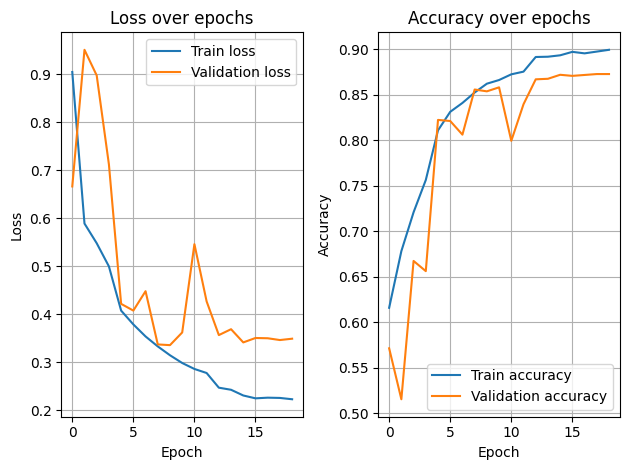

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


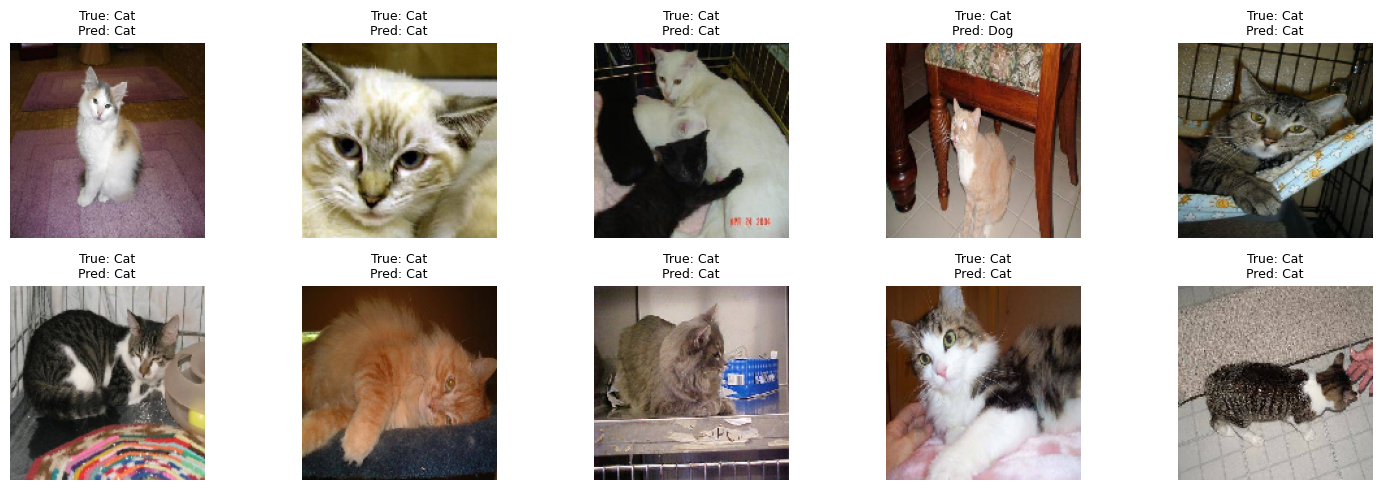

In [14]:
plt.subplot(1, 2, 1)

plt.plot(history.history['loss'], label='Train loss')

plt.plot(history.history['val_loss'], label='Validation loss')

plt.title('Loss over epochs')

plt.grid()

plt.xlabel('Epoch')

plt.ylabel('Loss')

plt.legend()
 
# Криві точності

plt.subplot(1, 2, 2)

plt.plot(history.history['accuracy'], label='Train accuracy')

plt.plot(history.history['val_accuracy'], label='Validation accuracy')

plt.title('Accuracy over epochs')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.grid()

plt.legend()
 
plt.tight_layout()

plt.show()
 
# Отримуємо batch із тестового генератора

images, true_labels = next(test_generator)
 
# Робимо передбачення

pred_probs = model.predict(images)

pred_labels = (pred_probs > 0.5).astype(int).reshape(-1)
 
# Назви класів

class_names = ['Cat', 'Dog']
 
# Показуємо перші 10 зображень

plt.figure(figsize=(15, 5))

for i in range(10):

    plt.subplot(2, 5, i + 1)

    plt.imshow(images[i])

    plt.axis('off')

    true_class = class_names[int(true_labels[i])]

    pred_class = class_names[int(pred_labels[i])]

    plt.title(f"True: {true_class}\nPred: {pred_class}", fontsize=9)

plt.tight_layout()

plt.show()
 

**Висновок:**
У цій лабораторній роботі ми створити згорткову нейронну мережу для розпізнавання зображень котів та собак. Далі ми підготували дані, налаштували генератори для тренувального, валідаційного та тестового наборів. Після 19 епох навчання модель досягла точності на тестовому наборі у 86.42%. Це свідчить про її здатність успішно класифікувати нові зображення котів та собак.